# Amazon Probe Analysis 


In [158]:
# This notebook was built in Catherine's root environment. 
import pandas as pd
from pandas import DataFrame
import numpy as np
import os
import glob
import datetime
import pylab
import matplotlib as plt
import datetime as datetime  
import statsmodels.api as sm  
import matplotlib.pyplot as plt

# plt.style.use('ggplot')

In [159]:
%matplotlib inline

## Bring in Data

In [160]:
%cd /Users/ckuhn/Documents/General Exam/Data/Amazon/T5/licor/  

licor = pd.read_table('licor.csv', low_memory=False, sep=",", header = 0,parse_dates=[['Date', 'Time']])

/Users/ckuhn/Documents/General Exam/Data/Amazon/T5/licor


In [161]:
licor.head()

,Date_Time,CO2(ppm),Cell Temp (c),Cell Press (kpa)
0,2016-11-04 04:11:58,1000.45,51.44,100.27
1,2016-11-04 04:11:59,1001.77,51.44,100.28
2,2016-11-04 04:12:00,1003.13,51.44,100.28
3,2016-11-04 04:12:01,1004.26,51.44,100.28
4,2016-11-04 04:12:02,1005.45,51.44,100.28


In [57]:
licor['CO2(ppm)'] = pd.to_numeric(licor['CO2(ppm)'], errors='coerce')
licor['CO2(ppm)'].describe()

count    267967.000000
mean       1055.431275
std         188.142002
min         570.840000
25%         956.220000
50%        1053.320000
75%        1137.110000
max        2440.990000
Name: CO2(ppm), dtype: float64

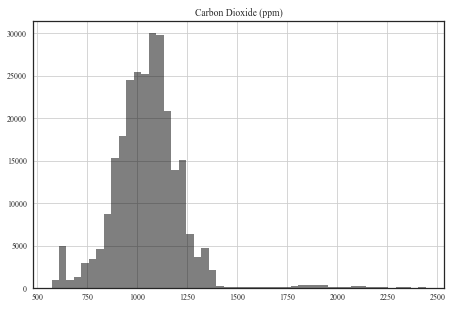

In [58]:
def set_style():
    plt.style.use(['seaborn-white', 'seaborn-paper'])
    plt.rc("font", family="Times New Roman")
    
set_style()    
fig = licor['CO2(ppm)'].hist(color='k', alpha=0.5, bins=50)
fig.set_title('Carbon Dioxide (ppm)')

plt.tight_layout()

plt.savefig('licorhist.png', dpi = 300)

## Sonde Data

In [132]:
%cd /Users/ckuhn/Documents/General Exam/Data/Amazon/T5/sonde/  
sonde = pd.read_table('sonde.csv', low_memory=False, sep=',', header = 0, parse_dates=[['Date (MM/DD/YYYY)', 'Time (HH:MM:SS)']])

/Users/ckuhn/Documents/General Exam/Data/Amazon/T5/sonde


In [133]:
sonde.head(3)

,Date (MM/DD/YYYY)_Time (HH:MM:SS),Unnamed: 0,BGA-PC RFU,BGA-PC ug/L,BGA-PE RFU,BGA-PE g/L,Battery V,Cable Pwr V,Chlorophyll RFU,Chlorophyll ug/L,...,TDS mg/L,TSS mg/L,Temp C,Time (Fract. Sec),Turbidity FNU,fDOM QSU,fDOM RFU,nLF Cond uS/cm,pH,pH mV
0,2016-11-04 04:09:45,0,-2.16,-2.16,NaN,NaN,6.4,11.4,0.09,0.36,...,NaN,0.0,30.100,0,35.87,48.52,4.53,69.5,8.99,-185.9
1,2016-11-04 04:10:00,1,-2.15,-2.15,NaN,NaN,6.4,11.4,0.05,0.22,...,NaN,0.0,30.103,0,36.38,48.56,4.55,69.4,8.99,-185.8
2,2016-11-04 04:10:15,2,-2.17,-2.17,NaN,NaN,6.4,11.4,0.07,0.28,...,NaN,0.0,30.098,0,37.84,48.53,4.54,69.4,8.99,-185.7


In [134]:
sonde.describe()

,Unnamed: 0,BGA-PC RFU,BGA-PC ug/L,BGA-PE RFU,BGA-PE g/L,Battery V,Cable Pwr V,Chlorophyll RFU,Chlorophyll ug/L,Cond uS/cm,...,TDS mg/L,TSS mg/L,Temp C,Time (Fract. Sec),Turbidity FNU,fDOM QSU,fDOM RFU,nLF Cond uS/cm,pH,pH mV
count,11933.000000,4404.000000,4404.000000,7529.000000,7529.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000,...,7529.000000,9007.0,11933.000000,11933.0,9007.000000,11933.000000,11933.000000,11933.000000,11933.000000,11933.000000
mean,5966.000000,-1.857627,-1.857627,0.382917,1.072299,6.267762,10.912570,0.039303,0.157394,66.216626,...,37.376677,0.0,30.220553,0.0,41.400613,37.196460,0.832891,59.550147,7.720719,-91.518252
std,3444.904716,0.426340,0.426340,0.152280,0.426303,0.193826,2.207838,0.059300,0.236993,9.216058,...,1.221582,0.0,0.224781,0.0,24.491444,7.028245,21.803318,8.318381,0.905339,66.889233
min,0.000000,-2.260000,-2.260000,0.030000,0.080000,5.800000,0.000000,-0.110000,-0.440000,2.400000,...,31.000000,0.0,29.640000,0.0,12.750000,20.270000,-59.970000,2.200000,6.250000,-201.500000
25%,2983.000000,-2.170000,-2.170000,0.290000,0.810000,6.200000,11.300000,0.000000,0.000000,63.300000,...,37.000000,0.0,30.055000,0.0,27.680000,33.690000,3.020000,56.800000,7.250000,-186.400000
50%,5966.000000,-2.130000,-2.130000,0.350000,0.990000,6.300000,11.400000,0.030000,0.130000,64.200000,...,38.000000,0.0,30.160000,0.0,31.880000,34.700000,10.590000,57.600000,7.300000,-44.600000
75%,8949.000000,-1.300000,-1.300000,0.440000,1.220000,6.400000,11.400000,0.070000,0.270000,75.100000,...,38.000000,0.0,30.361000,0.0,40.875000,42.240000,11.480000,67.700000,9.000000,-41.900000
max,11932.000000,0.460000,0.460000,1.210000,3.380000,6.400000,11.400000,0.350000,1.410000,146.800000,...,45.000000,0.0,30.947000,0.0,165.760000,51.880000,12.980000,131.500000,9.380000,-15.900000


In [62]:
sonde.columns

Index([u'Date (MM/DD/YYYY)_Time (HH:MM:SS)', u'Unnamed: 0', u'BGA-PC RFU',
       u'BGA-PC ug/L', u'BGA-PE RFU', u'BGA-PE g/L', u'Battery V',
       u'Cable Pwr V', u'Chlorophyll RFU', u'Chlorophyll ug/L', u'Cond uS/cm',
       u'Depth m', u'Fault Code', u'ODO % sat', u'ODO mg/L', u'ORP mV',
       u'ORP raw mV', u'Press psi a', u'Sal psu', u'Site Name',
       u'SpCond uS/cm', u'TDS mg/L', u'TSS mg/L', u'Temp C',
       u'Time (Fract. Sec)', u'Turbidity FNU', u'fDOM QSU', u'fDOM RFU',
       u'nLF Cond uS/cm', u'pH', u'pH mV'],
      dtype='object')

In [63]:
# Subset down to relevant columns
littlesonde = sonde[['Chlorophyll ug/L'] + ['ODO mg/L'] + ['Sal psu'] + ['Temp C'] + ['Turbidity FNU'] + ['fDOM QSU']  + ['pH']]
littlesonde.head(2)

,Chlorophyll ug/L,ODO mg/L,Sal psu,Temp C,Turbidity FNU,fDOM QSU,pH
0,0.36,6.95,0.03,30.100,35.87,48.52,8.99
1,0.22,6.95,0.03,30.103,36.38,48.56,8.99


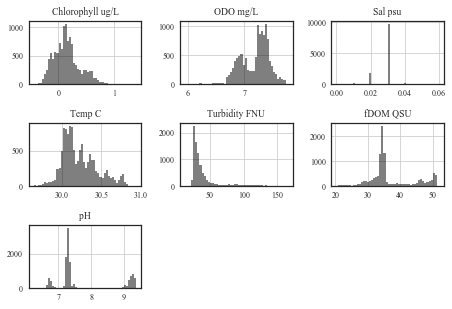

In [67]:
def set_style():
    plt.style.use(['seaborn-white', 'seaborn-paper'])
    plt.rc("font", family="Times New Roman")
    
set_style()    
littlesonde.hist(color='k', alpha=0.5, bins=50)
plt.tight_layout()

plt.savefig('sondehist.png', dpi = 300)

# Helpful: http://matplotlib.org/users/tight_layout_guide.html#plotting-guide-tight-layout
# Also Helpful: http://www.jesshamrick.com/2016/04/13/reproducible-plots/

# GPS Data

In [68]:
%cd /Users/ckuhn/Documents/General Exam/Data/Amazon/T5/GPS/GPS1 
gps = pd.read_table('GPS1_merged_points.csv', low_memory=False, sep=',', header = 0)

/Users/ckuhn/Documents/General Exam/Data/Amazon/T5/GPS/GPS1


In [69]:
gps.head(3)

,X,Y,track_fid,track_seg_,track_se_1,ele,time,gpxtpx_Tra,latitude,longitude
0,-51.140234,-0.052336,0,0,0,5.42,04:09.0,0,-0.052336,-51.140234
1,-51.140237,-0.052335,0,0,1,5.42,04:39.0,0,-0.052335,-51.140237
2,-51.140232,-0.052339,0,0,2,4.94,05:09.0,0,-0.052339,-51.140232


## Joins

combine date + time columns

In [138]:
# Set the date time column as the index
licor['times'] = licor['Date_Time']
sonde['times'] = sonde['Date (MM/DD/YYYY)_Time (HH:MM:SS)']

In [139]:
# This 
sonde = sonde.set_index(pd.DatetimeIndex(sonde['times']))
licor = licor.set_index(pd.DatetimeIndex(licor['times']))
sonde.head()

,Date (MM/DD/YYYY)_Time (HH:MM:SS),Unnamed: 0,BGA-PC RFU,BGA-PC ug/L,BGA-PE RFU,BGA-PE g/L,Battery V,Cable Pwr V,Chlorophyll RFU,Chlorophyll ug/L,...,TSS mg/L,Temp C,Time (Fract. Sec),Turbidity FNU,fDOM QSU,fDOM RFU,nLF Cond uS/cm,pH,pH mV,times
times,,,,,,,,,,,,,,,,,,,,,
2016-11-04 04:09:45,2016-11-04 04:09:45,0,-2.16,-2.16,NaN,NaN,6.4,11.4,0.09,0.36,...,0.0,30.100,0,35.87,48.52,4.53,69.5,8.99,-185.9,2016-11-04 04:09:45
2016-11-04 04:10:00,2016-11-04 04:10:00,1,-2.15,-2.15,NaN,NaN,6.4,11.4,0.05,0.22,...,0.0,30.103,0,36.38,48.56,4.55,69.4,8.99,-185.8,2016-11-04 04:10:00


In [140]:
licorandsonde = pd.merge(licor, sonde, on='times', how = 'outer', indicator ='indicator_column')

pd.pivot_table(licorandsonde,index=["indicator_column"],
               values=["pH"],aggfunc=np.count_nonzero)

,pH
indicator_column,
left_only,259605.0
right_only,709.0
both,11224.0


In [141]:
# Check the length. Look, they agree!
print ('dataframe dimensions')
print(licor.shape)
print(sonde.shape)

print('unique timestamps =') 
print(len(licor['times'].unique()))
print(len(sonde['times'].unique()))

dataframe dimensions
(267967, 5)
(11933, 32)
unique timestamps =
267964
9010


In [142]:
print(sonde['times'].head(2))  
print(licor['times'].head(2))

times
2016-11-04 04:09:45   2016-11-04 04:09:45
2016-11-04 04:10:00   2016-11-04 04:10:00
Name: times, dtype: datetime64[ns]
times
2016-11-04 04:11:58   2016-11-04 04:11:58
2016-11-04 04:11:59   2016-11-04 04:11:59
Name: times, dtype: datetime64[ns]


In [143]:
# Documentation: https://pandas.pydata.org/pandas-docs/stable/api.html#datetimelike-properties
licor['times'].dt.minute.head(3)

times
2016-11-04 04:11:58    11
2016-11-04 04:11:59    11
2016-11-04 04:12:00    12
Name: times, dtype: int64

In [144]:
# This will show you all the dates greater than that date.
ts = pd.to_datetime('11/05/2016')
licor.loc[licor.times >= ts, :].head(5)

,Date_Time,CO2(ppm),Cell Temp (c),Cell Press (kpa),times
times,,,,,
2016-11-05 03:40:39,2016-11-05 03:40:39,1089.40,51.44,100.00,2016-11-05 03:40:39
2016-11-05 03:40:40,2016-11-05 03:40:40,1089.26,51.44,100.00,2016-11-05 03:40:40
2016-11-05 03:40:41,2016-11-05 03:40:41,1088.87,51.44,100.00,2016-11-05 03:40:41
2016-11-05 03:40:42,2016-11-05 03:40:42,1088.85,51.44,99.99,2016-11-05 03:40:42
2016-11-05 03:40:43,2016-11-05 03:40:43,1088.80,51.44,99.99,2016-11-05 03:40:43


What was the duration of this time series (i.e. length of cruise)?

In [145]:
(licor.times.max() - licor.times.min()).days

5

How many samples did they take each day? 

4    53837
5    31488
6    46510
7    50558
8    44812
9    40762
Name: day, dtype: int64


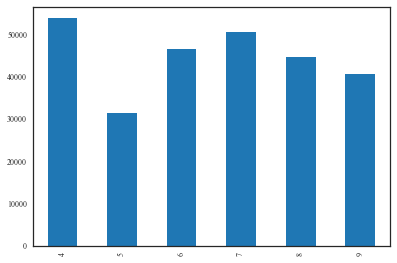

In [114]:
licor['day'] = licor.times.dt.day
print(licor.day.value_counts().sort_index())
licor.day.value_counts().sort_index().plot(kind='bar')

## Resampling To A Minute

In [154]:
licor_resampled = licor.resample("T").sum()
sonde_resampled = sonde.resample("T").sum()

In [168]:
print(licor_resampled.shape)
print(sonde_resampled.shape)

(7935, 3)
(7923, 29)


In [169]:
licor_resampled.head(2)

,CO2(ppm),Cell Temp (c),Cell Press (kpa)
times,,,
2016-11-04 04:11:00,2002.22,102.88,200.55
2016-11-04 04:12:00,61431.05,3034.96,5915.91


## Joining the Licor and Sonde Data

In [170]:
merged = licor_resampled.merge(sonde_resampled, how='left', left_index=True, right_index=True)

In [171]:
merged.shape

(7935, 32)

## Time Series Plots 

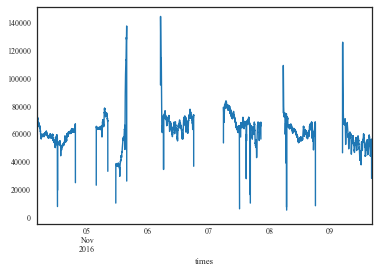

In [172]:
merged['CO2(ppm)'].plot();

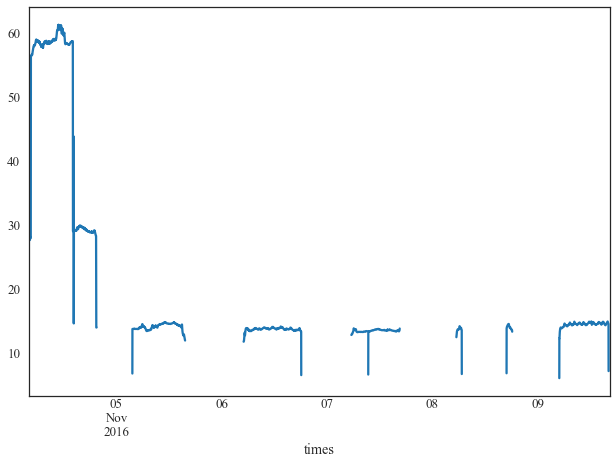

In [181]:
merged['ODO mg/L'].plot();

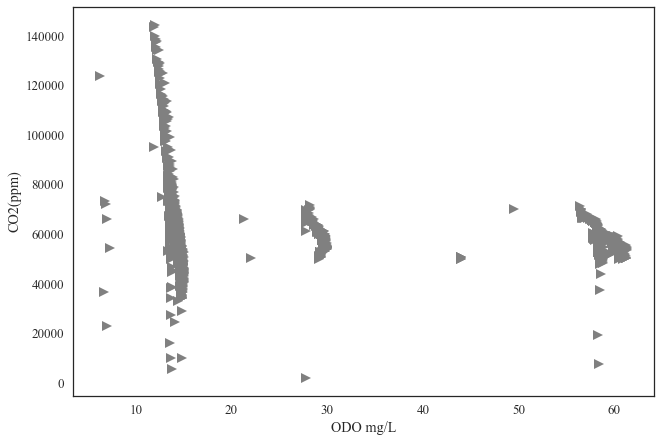

In [183]:
def set_style():
    plt.style.use(['seaborn-white', 'seaborn-talk'])
    plt.rc("font", family="Times New Roman")
    
set_style()

y = merged['CO2(ppm)']
x = merged['ODO mg/L']
plt.xlabel('ODO mg/L')
plt.ylabel('CO2(ppm)')

plt.plot((x),(y), ">", color = 'grey')
#plt.plot([3500, 0], [0, 3500], 'r--', lw = 4)

These plots show the binned one minute average value (in green), as well as the min and max, for the probes.

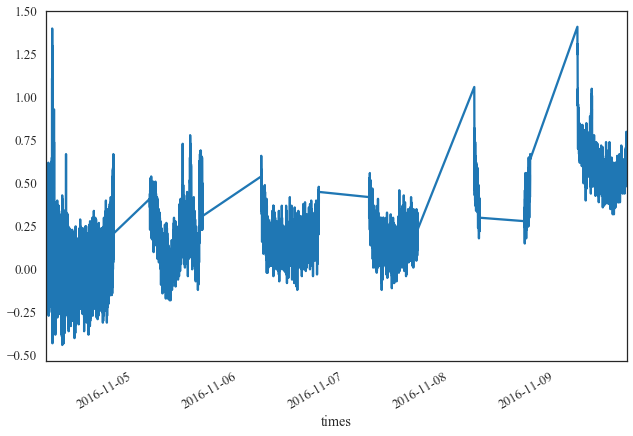

In [188]:
sonde['Chlorophyll ug/L'].plot();

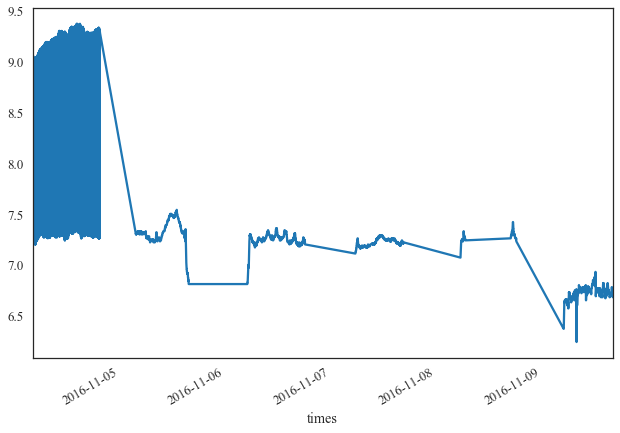

In [189]:
sonde['pH'].plot();

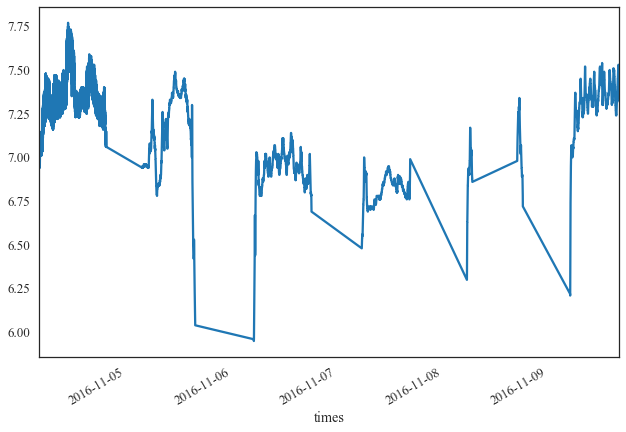

In [190]:
sonde['ODO mg/L'].plot();

### Junkyard

In [78]:
#Helpful http://earthpy.org/pandas-basics.html

# https://stackoverflow.com/questions/36292959/pandas-merge-data-frames-on-datetime-index
    
    
    #merged = pd.merge(licor_resampled,sonde_resampled, on=['times','times'], how='left')

# Theoretically we are resampling to the minute
# Old way, still works, gives min and max
licor = licor.resample("T", how=['mean', np.min, np.max])
sonde = sonde.resample("T", how=['mean', np.min, np.max])

print (licor['times'].resample('1Min').mean())
pd.rolling_corr(sonde['times'], sonde['pH'], window=3).plot(style='-g')